# Handout 5

In [3]:
#Shapiro Wilk Test
from scipy.stats import norm
from scipy.stats import gamma
from scipy.stats import shapiro

x = norm.rvs(loc=5,scale=10,size=100)
y = gamma.rvs(5,size=100)
print('Statistic %s , p-value %s ' % shapiro(x),'Statistic %s , p-value %s ' % shapiro(y))

Statistic 0.9917942881584167 , p-value 0.8061320781707764  Statistic 0.8939921855926514 , p-value 7.456945922967861e-07 


In [ ]:
# normal probablilty plot Q-Q plot

# Box Plot

#Outlier Test

In [ ]:
# Brown Forsythe Levene, BFL Test
from scipy.stats import levene

             sum_sq     df         F    PR(>F)
C(hab)     76695.04    5.0  2.966874  0.014015
Residual  744493.12  144.0       NaN       NaN


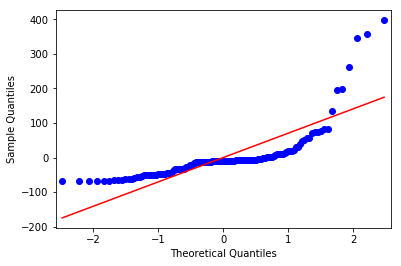

Shaprio Statistic 0.6155734658241272 , Shapiro p-value 3.4583521851925936e-18 
                 sum_sq     df         F    PR(>F)
C(hab)     71145.653333    5.0  2.927782  0.015077
Residual  699845.440000  144.0       NaN       NaN


{'boxes': [<matplotlib.lines.Line2D at 0x223ce902048>],
 'caps': [<matplotlib.lines.Line2D at 0x223ce8a88d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x223cdac0e80>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x223ce8b6d30>],
 'whiskers': [<matplotlib.lines.Line2D at 0x223ce9029e8>,
  <matplotlib.lines.Line2D at 0x223cf916e48>]}

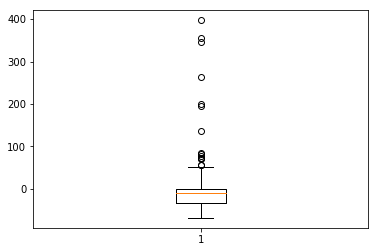

In [16]:
# Replica of Crab-AOVResAnal.R
# It is much easier to replicate R in python than to replica SAS
#make the graphs pretty
%matplotlib inline
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import levene
import matplotlib.pyplot as plt
from statistics import median

site_1 = [0,0,22,3,17,0,0,7,11,11,73, 33, 0, 65, 13, 44, 20, 27, 48, 104, 233, 81, 22, 9, 2]
site_2 = [0,0,56,0,8,0,3,1,16,55,142, 10, 2, 145, 6, 4, 5, 124, 24, 204, 415, 466, 6, 14, 12]
site_3 = [0,0,4,13,5,1,1, 4, 4, 36, 407, 0, 0, 18, 4, 14, 0, 24, 52, 314, 245, 107, 5, 6, 2]
site_4 = [0, 0, 0, 4, 2, 2, 5, 4, 2, 1, 0, 12, 1, 30, 0, 3, 28, 2, 21, 8, 82, 12, 10, 2, 0]
site_5 = [0, 1, 1, 2, 2, 1, 2, 29, 2, 2, 0, 13, 0, 19, 1, 3, 26, 30, 5, 4, 94, 1, 9, 3, 0]
site_6 = [0, 0, 0, 2, 3, 0, 0, 4, 0, 5, 4, 22, 0, 64, 4, 4, 43, 3, 16, 19, 95, 6, 22, 0, 0]
y = site_1 + site_2 + site_3 + site_4 + site_5 + site_6
S1 = ["H1"]*25
S2 = ["H2"]*25
S3 = ["H3"]*25
S4 = ["H4"]*25
S5 = ["H5"]*25
S6 = ["H6"]*25
hab = S1 + S2 + S3 + S4 + S5 + S6

data = pd.DataFrame({'hab':hab,
                    'y':y})

formula = 'y ~ C(hab)'
model = ols(formula, data).fit()
aov_table = anova_l
m(model, typ=2)

print(aov_table)

res = model.resid 
fig = qqplot(res, line='s')
plt.show()

#add additional R plots

#Shapiro Test
print('Shaprio Statistic %s , Shapiro p-value %s ' % shapiro(res))

# B-F-L test of homogeneity of Variances
z = []
for site in [site_1, site_2, site_3, site_4, site_5, site_6]:
    #print([site_i - median(site) for site_i in site])
    z = z + [abs(site_i - median(site)) for site_i in site]

#print(z)
data = pd.DataFrame({'hab':hab,
                    'z':z})

formula = 'z ~ C(hab)'
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=2)

print(aov_table)

# lev1 = aov(z~site)

# summary(lev1)
plt.boxplot(res)

In [ ]:
#power transformation 
#transcrab - log transformation?

In [18]:
#boxcox_crabs_v2.R in python
#this is incomplete
site_1 = [0,0,22,3,17,0,0,7,11,11,73, 33, 0, 65, 13, 44, 20, 27, 48, 104, 233, 81, 22, 9, 2]
site_2 = [0,0,56,0,8,0,3,1,16,55,142, 10, 2, 145, 6, 4, 5, 124, 24, 204, 415, 466, 6, 14, 12]
site_3 = [0,0,4,13,5,1,1, 4, 4, 36, 407, 0, 0, 18, 4, 14, 0, 24, 52, 314, 245, 107, 5, 6, 2]
site_4 = [0, 0, 0, 4, 2, 2, 5, 4, 2, 1, 0, 12, 1, 30, 0, 3, 28, 2, 21, 8, 82, 12, 10, 2, 0]
site_5 = [0, 1, 1, 2, 2, 1, 2, 29, 2, 2, 0, 13, 0, 19, 1, 3, 26, 30, 5, 4, 94, 1, 9, 3, 0]
site_6 = [0, 0, 0, 2, 3, 0, 0, 4, 0, 5, 4, 22, 0, 64, 4, 4, 43, 3, 16, 19, 95, 6, 22, 0, 0]
y = site_1 + site_2 + site_3 + site_4 + site_5 + site_6
for i, z in enumerate(y):
    y[i] = z + 1
S1 = ["H1"]*25
S2 = ["H2"]*25
S3 = ["H3"]*25
S4 = ["H4"]*25
S5 = ["H5"]*25
S6 = ["H6"]*25
hab = S1 + S2 + S3 + S4 + S5 + S6

from scipy import stats
stats.boxcox(y)

(array([ 0.        ,  0.        ,  2.40936959,  1.23004054,  2.26516526,
         0.        ,  0.        ,  1.74120414,  2.01253422,  2.01253422,
         3.01739372,  2.62681701,  0.        ,  2.9632361 ,  2.11071137,
         2.77379219,  2.35657641,  2.5206744 ,  2.8170263 ,  3.17640864,
         3.50571014,  3.06506627,  2.40936959,  1.89292201,  0.99886998,
         0.        ,  0.        ,  2.89222523,  0.        ,  1.82202885,
         0.        ,  1.23004054,  0.6525113 ,  2.23063474,  2.88352733,
         3.30886954,  1.95592929,  0.99886998,  3.31751726,  1.64752182,
         1.40145633,  1.53659809,  3.25206239,  2.45702072,  3.45449174,
         3.71506631,  3.7546451 ,  1.64752182,  2.15379627,  2.06384528,
         0.        ,  0.        ,  1.40145633,  2.11071137,  1.53659809,
         0.6525113 ,  0.6525113 ,  1.40145633,  1.40145633,  2.67192099,
         3.70834113,  0.        ,  0.        ,  2.29750999,  1.40145633,
         2.15379627,  0.        ,  2.45702072,  2.8

In [19]:
#Kruskal Wallis Test - Replica of code on page 42
# also could be expanded
from scipy import stats

site_1 = [0,0,22,3,17,0,0,7,11,11,73, 33, 0, 65, 13, 44, 20, 27, 48, 104, 233, 81, 22, 9, 2]
site_2 = [0,0,56,0,8,0,3,1,16,55,142, 10, 2, 145, 6, 4, 5, 124, 24, 204, 415, 466, 6, 14, 12]
site_3 = [0,0,4,13,5,1,1, 4, 4, 36, 407, 0, 0, 18, 4, 14, 0, 24, 52, 314, 245, 107, 5, 6, 2]
site_4 = [0, 0, 0, 4, 2, 2, 5, 4, 2, 1, 0, 12, 1, 30, 0, 3, 28, 2, 21, 8, 82, 12, 10, 2, 0]
site_5 = [0, 1, 1, 2, 2, 1, 2, 29, 2, 2, 0, 13, 0, 19, 1, 3, 26, 30, 5, 4, 94, 1, 9, 3, 0]
site_6 = [0, 0, 0, 2, 3, 0, 0, 4, 0, 5, 4, 22, 0, 64, 4, 4, 43, 3, 16, 19, 95, 6, 22, 0, 0]

stats.kruskal(site_1, site_2, site_3, site_4, site_5, site_6)

KruskalResult(statistic=12.599578437214745, pvalue=0.027434507875088551)

In [ ]:
#Additional Multiple Comparisions using Ranks

In [ ]:
#Generalized Linear Models

0.36639371116


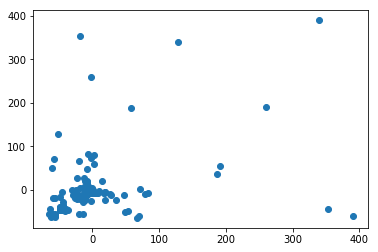

In [22]:
#Tests for Correlation in the Residuals 
%matplotlib inline
import matplotlib.pyplot as plt
#Durbin Watson Statistic
#Replica of crab_corr_plots.R

#crab_corrplots.R
# use y and site from previous data

res = model.resid 

rsraw  = res[2:150]
rsrawl1  = res[1:149]

#skipping time series
#plot(rstime1,type = "b",ylab = "res_raw",main = "Resid_Raw vs Order")
plt.scatter(rsrawl1,rsraw)

#Calculation of Durbin-Watson Statistics

dif1  = [(residraw1-residraw2)**2 for residraw1, residraw2 in zip(rsraw,rsrawl1)]
num1  = sum(dif1)
rs12  = list(map(lambda x: x**2, res))
den1  = sum(rs12)
DW1  = num1/den1
prd1  = [(residraw1*residraw2) for residraw1, residraw2 in zip(rsraw,rsrawl1)]
prdsum1  = sum(prd1)
rho1  = prdsum1/den1
print(rho1)

In [38]:
#runtestCrabdata.R
import numpy as np

# use results from above
site_1 = [0,0,22,3,17,0,0,7,11,11,73, 33, 0, 65, 13, 44, 20, 27, 48, 104, 233, 81, 22, 9, 2]
site_2 = [0,0,56,0,8,0,3,1,16,55,142, 10, 2, 145, 6, 4, 5, 124, 24, 204, 415, 466, 6, 14, 12]
site_3 = [0,0,4,13,5,1,1, 4, 4, 36, 407, 0, 0, 18, 4, 14, 0, 24, 52, 314, 245, 107, 5, 6, 2]
site_4 = [0, 0, 0, 4, 2, 2, 5, 4, 2, 1, 0, 12, 1, 30, 0, 3, 28, 2, 21, 8, 82, 12, 10, 2, 0]
site_5 = [0, 1, 1, 2, 2, 1, 2, 29, 2, 2, 0, 13, 0, 19, 1, 3, 26, 30, 5, 4, 94, 1, 9, 3, 0]
site_6 = [0, 0, 0, 2, 3, 0, 0, 4, 0, 5, 4, 22, 0, 64, 4, 4, 43, 3, 16, 19, 95, 6, 22, 0, 0]
y = site_1 + site_2 + site_3 + site_4 + site_5 + site_6

data6 = np.matrix([site_1,site_2,site_3,site_4,site_5,site_6])
# data6 = matrix(site,nrow=6,byrow=T)
# resid = matrix(0,6,25)
# residl1 = matrix(0,6,24)
# resid1 = matrix(0,6,24)
# dif1 = matrix(0,6,24)
# prd1 = matrix(0,6,24)
# DW     = c(0,0,0,0,0,0)
# rho    = c(0,0,0,0,0,0)
# means6 = c(0,0,0,0,0,0)

means6 = np.mean(data6,axis=1)
print(means6)
resid = np.zeros((6,25))
print(resid)
for i in range(6):
    resid[i] = [data6_i - means6[i] for data6_i in data6[i,:]]
# for (i in 1:6) {
#   means6[i] = mean(data6[i,])
#    resid[i,]   = data6[i,]-means6[i]
#    resid1[i,]  = resid[i,2:25]
#    residl1[i,] = resid[i,1:24]

#   for (j in 1:24){
    
#     dif1[i,j] = (resid1[i,j]-residl1[i,j])^2
#     prd1[i,j] = resid1[i,j]*residl1[i,j]

#   }
#    rho[i] = sum(prd1[i,])/sum((resid[i,])^2)

#    DW[i] = sum(dif1[i,])/sum((resid[i,])^2)

#   } 

#  rstime1  = ts(resid[1,],start = 1,frequency = 1)
# plot(rstime1,type = "b",ylab = "res_raw",main = "Resid_Raw vs Order Habitat=1")
#  abline(h = 0,lty = 2)
#  rstime2  = ts(resid[2,],start = 1,frequency = 1)
# plot(rstime2,type = "b",ylab = "res_raw",main = "Resid_Raw vs Order Habitat=2")
#  abline(h = 0,lty = 2)
#  rstime3  = ts(resid[3,],start = 1,frequency = 1)
# plot(rstime3,type = "b",ylab = "res_raw",main = "Resid_Raw vs Order Habitat=3")
#  abline(h = 0,lty = 2)
#  rstime4  = ts(resid[4,],start = 1,frequency = 1)
# plot(rstime4,type = "b",ylab = "res_raw",main = "Resid_Raw vs Order Habitat=4")
#  abline(h = 0,lty = 2)
#  rstime5  = ts(resid[5,],start = 1,frequency = 1)
# plot(rstime5,type = "b",ylab = "res_raw",main = "Resid_Raw vs Order Habitat=5")
#  abline(h = 0,lty = 2)
#  rstime6  = ts(resid[6,],start = 1,frequency = 1)
# plot(rstime6,type = "b",ylab = "res_raw",main = "Resid_Raw vs Order Habitat=6")
#  abline(h = 0,lty = 2)




# plot(residl1[1,],resid1[1,],main = "Resid_Raw Lag Plot - Habitat 1")
# plot(residl1[2,],resid1[2,],main = "Resid_Raw Lag Plot - Habitat 2")
# plot(residl1[3,],resid1[3,],main = "Resid_Raw Lag Plot - Habitat 3")
# plot(residl1[4,],resid1[4,],main = "Resid_Raw Lag Plot - Habitat 4")
# plot(residl1[5,],resid1[5,],main = "Resid_Raw Lag Plot - Habitat 5")
# plot(residl1[6,],resid1[6,],main = "Resid_Raw Lag Plot - Habitat 6")




# n.neg = rep(0,6)
# n.pos = rep(0,6)
# for (i in 1:6) {
#   n.neg[i] = length(resid[i,][resid[i,]<0])
#   n.pos[i] = length(resid[i,][resid[i,]>0])
#   }
 
# numb.runs = rep(1,6)
# for (i in 1:6) {
#   for (j in 2:25) {
#     if (sign(resid[i,j]) != sign(resid[i,j-1])) {numb.runs[i] <- numb.runs[i] + 1}
#     }
#   }
  
# residruns.result <- as.data.frame(cbind(numb.runs, n.pos, n.neg))
# names(residruns.result) <- c("No. runs", "N+", "N-")

[[ 33.8 ]
 [ 68.72]
 [ 50.64]
 [  9.24]
 [ 10.  ]
 [ 12.64]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]]


ValueError: setting an array element with a sequence.

In [40]:
data6[i,:]

matrix([[  0,   0,  22,   3,  17,   0,   0,   7,  11,  11,  73,  33,   0,
          65,  13,  44,  20,  27,  48, 104, 233,  81,  22,   9,   2]])